In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [1]:
# # Sample time series data
# data = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118]
# df = pd.Series(data)

In [1]:
# plot_acf(df)
# plot_pacf(df)
# plt.show()

NameError: name 'plot_acf' is not defined

In [3]:
import sys
sys.path.append(r'C:\Users\shivam.vedant\.conda\envs\venv_energiapy\Lib\site-packages')
import pandas
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import Dropout
from scipy.signal import savgol_filter
from keras.optimizers import Adam
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

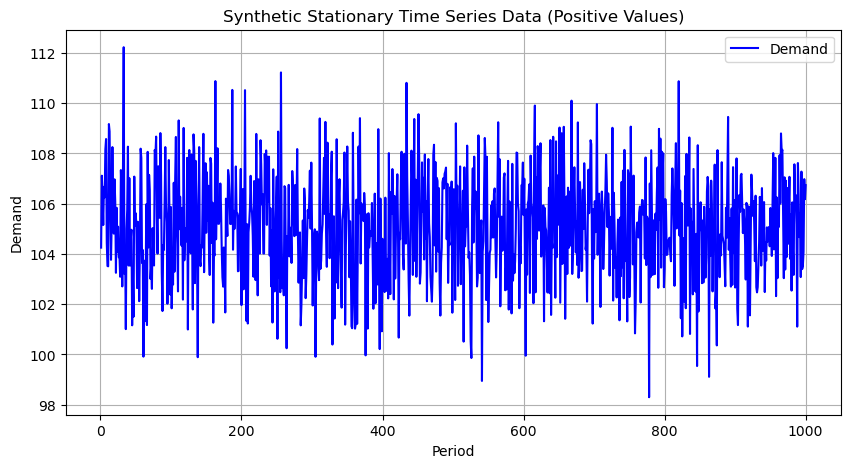

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Set seed for reproducibility
np.random.seed(32)

# Generate a stationary time series: AR(1) process
n_points = 1000
# phi = 1  # Autoregressive coefficient (stationarity: |phi| < 1)
noise_std = random.uniform(0,10)  # Standard deviation of white noise
base_demand = random.randint(100,175)  # Shift to ensure positivity

# Initialize the series
demand = []  # Start with a positive base demand
noise = np.random.normal(0, noise_std, n_points)

# Generate AR(1) stationary process
# for t in range(1, n_points):
#     next_value = phi * demand[t - 1] + noise[t]
#     demand.append(next_value)  # Ensure positive values by capping at 1
#     
for t in range(0, n_points):
    next_value = base_demand + noise[t]
    demand.append(next_value)

# Convert to a Pandas DataFrame
time_series_data = pd.DataFrame({'Period': range(1, n_points + 1), 'Demand': demand})

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(time_series_data['Period'], time_series_data['Demand'], label='Demand', color='blue')
plt.title('Synthetic Stationary Time Series Data (Positive Values)')
plt.xlabel('Period')
plt.ylabel('Demand')
plt.grid()
plt.legend()
plt.show()

# Print the first few rows of the dataset
# print(time_series_data.head())

# Save the dataset to a CSV file (optional)
# time_series_data.to_csv('positive_stationary_demand_data.csv', index=False)


In [6]:
# time_series_data
demand_data = time_series_data['Demand']

In [7]:
data = demand_data.values
dataset = data.reshape(-1,1)
# dataset

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [8]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

learning_rate = 0.0005

model = Sequential()
model.add(LSTM(32, input_shape=(1, look_back)))     # Number of neuron
model.add(Dropout(0.10))                                # Percentage of data ignored to avoid overfitting
# model.add(LSTM(64, return_sequences=True, input_shape=(1, look_back)))
# model.add(Dropout(0.10))
model.add(Dense(1))                                     # Number of output layer
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='mse', optimizer=optimizer)

history = model.fit(trainX, trainY, epochs=200, batch_size=50,
                    verbose=1, validation_data=(testX, testY))

Epoch 1/200


C:\Users\shivam.vedant\.conda\envs\venv_energiapy\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2795 - val_loss: 0.1879
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1764 - val_loss: 0.1121
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1084 - val_loss: 0.0611
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0566 - val_loss: 0.0334
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0381 - val_loss: 0.0235
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0287 - val_loss: 0.0220
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - val_loss: 0.0220
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0266 - val_loss: 0.0220
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0293 - val_loss: 0.0219
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0285 - val_loss: 0.0219
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286 - val_loss: 0.0219
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0293 - val_l

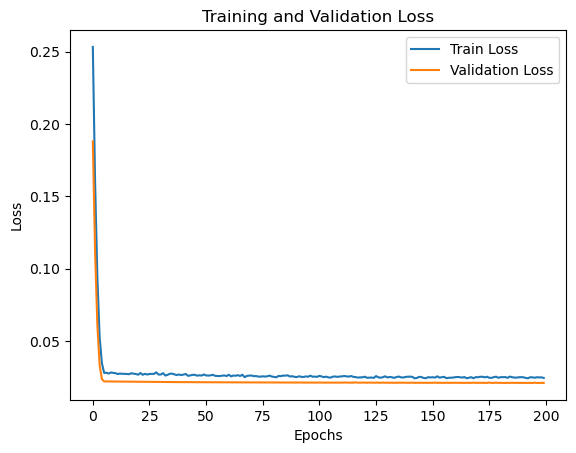

In [10]:
# Extract loss values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training loss and validation loss
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step
Train Score: 2.15 RMSE
Test Score: 2.02 RMSE
testPredictions:
[[105.057335]
 [104.71345 ]
 [105.367325]
 [105.475716]
 [104.943146]
 [105.04504 ]
 [105.23467 ]
 [105.05559 ]
 [105.21908 ]
 [105.32924 ]
 [105.350235]
 [105.34222 ]
 [104.92821 ]
 [105.109604]
 [104.99964 ]
 [105.005974]
 [105.41199 ]
 [105.23577 ]
 [105.01366 ]
 [105.28508 ]
 [104.94159 ]
 [104.81888 ]
 [105.08019 ]
 [104.40506 ]
 [105.05747 ]
 [105.0131  ]
 [104.90077 ]
 [104.849495]
 [104.93795 ]
 [104.80848 ]
 [104.91726 ]
 [104.888084]
 [104.94681 ]
 [105.19517 ]
 [104.98592 ]
 [104.94235 ]
 [105.078865]
 [105.002235]
 [104.46917 ]
 [105.23757 ]
 [105.14211 ]
 [104.97138 ]
 [105.02361 ]
 [105.01555 ]
 [105.373535]
 [105.03966 ]
 [104.67875 ]
 [105.429565]
 [105.23918 ]
 [104.4928  ]
 [104.65693 ]
 [104.82812 ]
 [105.26188 ]
 [104.999626]
 [104.9019  ]
 [105.32856 ]
 [105.04415 ]
 [104.60259 ]
 [104.89894 ]
 [104.95011 ]
 [105.31341 ]
 [105.

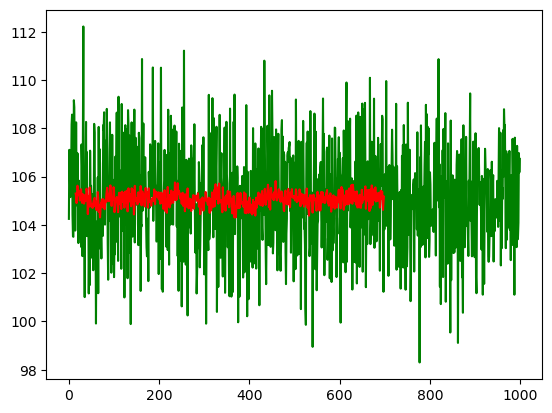

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
# trainPredict = np.exp(trainPredict)
trainY = scaler.inverse_transform([trainY])
# trainY = np.exp(trainY)
testPredict = scaler.inverse_transform(testPredict)
# testPredict = np.exp(testPredict)
testY = scaler.inverse_transform([testY])
# testY = np.exp(testY)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2) +
                1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), color='green')
plt.plot(trainPredictPlot, color='red')

print('testPredictions:')
print(testPredict)

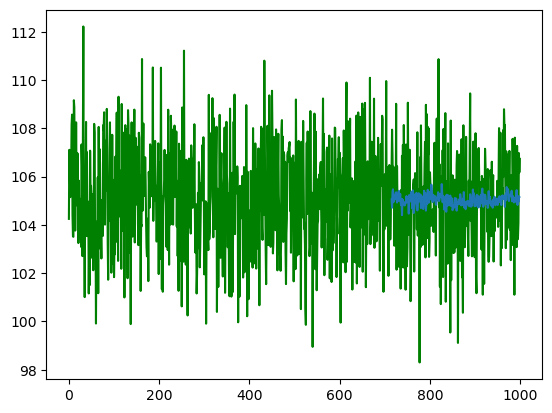

In [12]:
plt.plot(scaler.inverse_transform(dataset), color='green')
plt.plot(testPredictPlot)
plt.show()

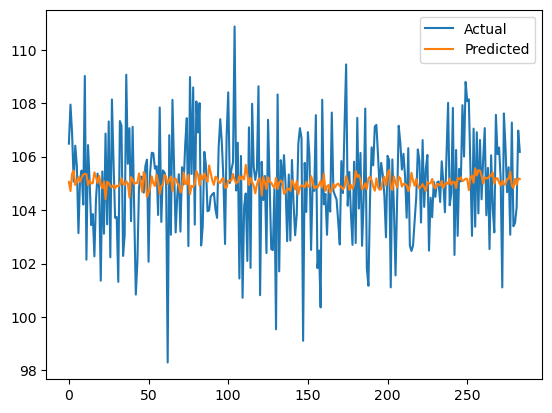

In [13]:
plt.plot(testY.flatten(), label='Actual')
plt.plot(testPredict, label='Predicted')
plt.legend()
plt.show()

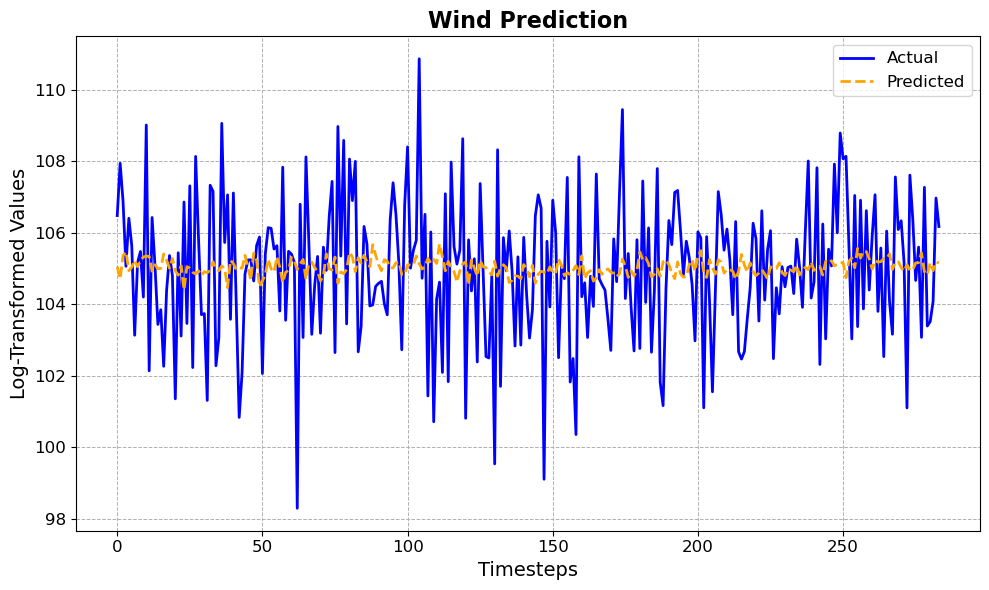

In [14]:
# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

# Plot the actual values and predictions
plt.plot(testY.flatten()[:500], label='Actual', color='blue', linestyle='-', linewidth=2)
plt.plot(testPredict[:500], label='Predicted', color='orange', linestyle='--', linewidth=2)

# Set title and axis labels
plt.title('Wind Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Timesteps', fontsize=14)
plt.ylabel('Log-Transformed Values', fontsize=14)

# Apply log scale to y-axis
# plt.yscale('log')

# Add grid for better readability
plt.grid(True, which="both", ls="--", linewidth=0.7)

# Add legend with some styling
plt.legend(loc='upper right', fontsize=12)

# Customize ticks for better clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Ensures everything fits nicely
plt.show()

In [15]:
rmse = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('RMSE:', rmse)
mape = np.mean(np.abs((testY[0] - testPredict[:, 0]) / testY[0])) * 100
print('MAPE:', mape)
r2 = r2_score(testY[0], testPredict[:, 0])
print('R-squared:', r2)


def mda(actual, predicted):
    actual_direction = np.sign(np.diff(actual))
    predicted_direction = np.sign(np.diff(predicted))
    correct_directions = np.sum(actual_direction == predicted_direction)
    mda_value = correct_directions / (len(actual_direction) - 1)
    return mda_value


mda_value = mda(testY[0], testPredict[:, 0])
print('MDA:', mda_value)

RMSE: 2.0157631960742837
MAPE: 1.5420027958739395
R-squared: -0.033583636131149674
MDA: 0.450354609929078


In [16]:
testY

array([[106.48602577, 107.9470142 , 106.88396758, 105.06687557,
        106.41079203, 105.64916567, 103.13879148, 105.1714947 ,
        105.48015056, 104.20663845, 109.01853935, 102.14388058,
        106.4314133 , 105.08579099, 103.44084479, 103.85268112,
        102.26944472, 104.39047135, 105.36764028, 104.81349295,
        101.36054635, 105.44536086, 103.11602376, 106.86345233,
        103.46731451, 107.31679121, 102.23464536, 108.13958758,
        105.83579466, 103.71467171, 103.74346689, 101.31535433,
        107.33300827, 107.16213034, 102.28508853, 103.07141245,
        109.0649441 , 105.73242677, 107.06445488, 103.5846538 ,
        107.11656922, 104.02397454, 100.84031308, 102.09432484,
        104.84996661, 105.24447397, 105.24794148, 104.65512829,
        105.64682457, 105.88500761, 102.06732382, 105.41373825,
        106.14657333, 106.12932122, 105.54912295, 105.64235825,
        103.81640375, 107.83865144, 103.55739765, 105.48522395,
        105.40837574, 105.17945564,  98.

In [17]:
testPredict

array([[105.057335],
       [104.71345 ],
       [105.367325],
       [105.475716],
       [104.943146],
       [105.04504 ],
       [105.23467 ],
       [105.05559 ],
       [105.21908 ],
       [105.32924 ],
       [105.350235],
       [105.34222 ],
       [104.92821 ],
       [105.109604],
       [104.99964 ],
       [105.005974],
       [105.41199 ],
       [105.23577 ],
       [105.01366 ],
       [105.28508 ],
       [104.94159 ],
       [104.81888 ],
       [105.08019 ],
       [104.40506 ],
       [105.05747 ],
       [105.0131  ],
       [104.90077 ],
       [104.849495],
       [104.93795 ],
       [104.80848 ],
       [104.91726 ],
       [104.888084],
       [104.94681 ],
       [105.19517 ],
       [104.98592 ],
       [104.94235 ],
       [105.078865],
       [105.002235],
       [104.46917 ],
       [105.23757 ],
       [105.14211 ],
       [104.97138 ],
       [105.02361 ],
       [105.01555 ],
       [105.373535],
       [105.03966 ],
       [104.67875 ],
       [105.4